# DSCI 571 lab 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import tree 
from ipy_table import *

## Instructions
rubric={mechanics:2}

Follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).


## Introduction 
The learning objectives of this lab are:
1. to learn how to use common evaluation metrics used in machine learning
2. to understand the Naive Bayes algorithm and how to use it with `scikit-learn`

## Exercise 1: Precision and recall "by hand"
rubric={reasoning:4}


Below is the confusion matrix of a machine learning system that predicts whether a cancer is malignant or not. 

|    Actual      | Predicted Benign | Predicted Malignant |
| :------------- | -----------------------: | -----------------------: |
| **Actual Benign**       | 438 | 6 |
| **Actual Malignant**       | 50 | 194 |

1. What is the accuracy of the classifier? 
2. What are the precision and recall? 
3. Discuss which evaluation metric would be more informative in this case. 

**Answers:** 
1. Accuracy = (194 + 438)/(194 + 438 + 50 + 6) = 0.91
2. Precision = TP / (TP + FP) = 194 / (194 + 6) = 0.97<br>
Recall = TP/(TP + FN) = 194 / (194 + 50) = 0.79
3. Precision and recall would be more informative in this case because 
    - The data is unbalanced with respect to the labels; there are many more benign cases compared to malignant cases.
    - Although the system is _precise_ in identifying malignant cases, it has a low recall; it misses many such cases. Accuracy does not tell the whole story in this case. In particular, it does not convey the information that the system mislabels many malignant cases as benign.  

## Exercise 2: Naive Bayes "by hand"

Consider the dataset below, which has $10$ training examples and $3$ features:

$$X = \begin{bmatrix}0 & 0 & 1\\0 & 1 & 1\\ 0 & 1 & 1\\ 1 & 1 & 0\\0 & 1 & 0\\0 & 1 & 1\\1 & 0 & 0\\1 & 1 & 0\\1 & 0 & 1\\1 & 0 & 0\\\end{bmatrix}, \quad y = \begin{bmatrix}\text{spam}\\\text{spam}\\\text{spam}\\\text{spam}\\\text{spam}\\\text{spam}\\\text{not spam}\\\text{not spam}\\\text{not spam}\\\text{not spam}\end{bmatrix}$$

The feature in the first column is `<your name>` (whether the e-mail contained your name), in the second column is "pharmaceutical" (whether the e-mail contained this word), and the third column is "PayPal" (whether the e-mail contained this word).
Suppose you believe that a naive Bayes model would be appropriate for this dataset, and you want to classify the following test example:

$$\hat{x} = \begin{bmatrix}1 & 1 & 0\end{bmatrix}$$

### 2(a) Prior probabilities
rubric={raw:2}

Compute the estimates of the class prior probabilities (you don't need to show any work):
1. $p(\text{spam})$.
2. $p(\text{not spam})$.

**Answers:** $6/10$, $4/10$

### 2(b) Conditional probabilities
rubric={raw:6}

Compute the estimates of the 6 conditional probabilities required by naive Bayes for this example (you don't need to show any work):

1. $p(\text{your name} = 1  \mid \text{spam})$.
2. $p(\text{pharmaceutical} = 1 \mid \text{spam})$.
3. $p(\text{PayPal} = 0  \mid \text{spam})$.
4. $p(\text{your name} = 1  \mid \text{not spam})$
5. $p(\text{pharmaceutical} = 1  \mid \text{not spam})$.
6. $p(\text{PayPal} = 0  \mid \text{not spam})$.

**Answers:** 1/6, 5/6, 2/6, 1, 1/4, 3/4

### 2(c) Prediction
rubric={reasoning:4}

Under the naive Bayes model and your estimates of the above probabilities, what is the most likely label for the test example? (Show your work.)

**Answer:**

$$p(\text{spam} \mid x_1 = 1, x_2 = 1, x_3 = 0) \propto p( x_1 = 1, x_2 = 1, x_3 = 0 \mid \text{spam})p(\text{spam}) $$

$$ = p(x_1 = 1\mid \text{spam})p(x_2 = 1 \mid \text{spam})p(x_3 = 0 \mid \text{spam})p(\text{spam})$$

$$ = (1/6)(5/6)(2/6)(6/10) $$

$$\approx 0.028 $$

And

$$p(\text{not spam} \mid  x_1 = 1, x_2 = 1, x_3 = 0) \propto p( x_1 = 1, x_2 = 1, x_3 = 0 \mid \text{not spam})p(\text{not spam}) $$

$$ = p(x_1 = 1 \mid \text{not spam})p(x_2 = 1 \mid \text{not spam})p(x_3 = 0 \mid \text{not spam})p(\text{not spam})  $$

$$ = (1)(1/4)(3/4)(4/10) $$

$$ \approx 0.075.$$

Since $p(\text{not spam} \mid  x_1 = 1, x_2 = 1, x_3 = 0)$ is proportional to a bigger number, and the proportionality constants are the same $(p(x_1=1,x_2=1,x_3=0))$, we would predict "not spam".

### (optional) 2(d) Laplace smoothing
rubric={reasoning:1}

One way to think of Laplace smoothing is that you're augmenting the training set with extra counts. Consider the estimates of the conditional probabilities in this dataset when we use Laplace smoothing (with $\beta = 1$). Give a set of extra training examples that we could add to the original training set that would make the basic estimates give us the estimates with Laplace smoothing. In other words give a set of extra training examples that, if they were included in the training set and we didn't use Laplace smoothing, would give the same estimates of the conditional probabilities as using the original dataset with Laplace smoothing.
Present your answer in a reasonably easy-to-read format, for example the same format as the data set at the start of this question.

**Answer:**

You could add the following examples:

$$X_\beta = \begin{bmatrix}0 & 0 & 0\\ 0 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 1 & 1\end{bmatrix}, \quad y_\beta = \begin{bmatrix}0 \\ 1 \\ 1 \\ 0\end{bmatrix}.$$


## Exercise 3: Naive Bayes for sentiment analysis

Naive Bayes is popular in text classification tasks. In this exercise you will use 
[multinomial Naive Bayes algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) as implemented in `scikit-learn` for a text classification task called [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis), which is a problem of assigning positive or negative label to a text based on the sentiment or attitude expressed in  it. 

You will use [IMDB movie review data set](https://www.kaggle.com/utathya/imdb-review-dataset) for this exercise. 

Download the CSV using the above link and unzip it. Please _do not commit the CSV to GitHub_ as it is very large. 

### 3(a) Loading data and preprocessing
rubric={accuracy:2}

1. Open the data CSV as a pandas DataFrame. (Hint: Use the `encoding` argument to open the CSV with the right encoding.)
2. There are three possible labels in the dataset: `pos`, `neg`, and `unsup`. Discard rows with `unsup` label from the dataframe. 

**Answer:**

In [2]:
imdb_df = pd.read_csv('imdb_master.csv', encoding = "ISO-8859-1")
imdb_df.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [3]:
imdb_df['label'].value_counts()

unsup    50000
neg      25000
pos      25000
Name: label, dtype: int64

In [4]:
# only consider positive and negative reviews
imdb_df = imdb_df[imdb_df['label'].str.startswith(('pos','neg'))]

### 3(b) Feature extraction
rubric={accuracy:4,quality:2}

The current data is in the form of moview reviews (text paragraphs) and their targets (`pos` or `neg`). 
You need to encode movie reviews into feature vectors so that you can train supervised machine learning models with `scikit-learn`. In this exercise you will do this in two different ways. 

#### Create word frequency counts (`X_counts`)
Turn the text into sparse vector of word frequency counts using [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) from  `scikit-learn`. Note that this may take a while to run, as you'll be dealing with ~50,000 movie reviews. Optionally, explore the arguments of `CountVectorizer` (e.g., [`stop_words`](https://scikit-learn.org/stable/modules/feature_extraction.html#stop-words), `ngram_range`, `max_features`, `min_df`, and `tokenizer`).  

#### Create binarized representation of words (`X_binary`)
Create binarized encoding (`X_binary`) of `X_counts`, where you replace word frequencies $\geq$ 1 by 1.    
The intuition behind using binarized representation is that for sentiment analysis word occurrence may matter more than word frequency. For instance, the occurrence of the word _excellent_ tells us a lot and the fact that it occurs four times may not tell us much more. 

**Answer:**

In [5]:
# For tokenization
import nltk
# For converting words into frequency counts
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
# initialize movie_vector object and then turn movie reviews train data into a vector 
movie_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, stop_words='english')

# use top 5000 words only
# movie_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, max_features = 5000) 
X_counts = movie_vec.fit_transform(imdb_df['review'])

# Convert raw frequency counts into binarized representation. 
X_binary = X_counts > 0

### 3(c) Train Naive Bayes classifier
rubric={accuracy:4,quality:2,reasoning:2}

1. Split (`X_counts`, `imdb_df.label`) into train (80%) and test (20%).
2. Train [multinomial Naive Bayes algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) on the train set. 
3. Report train and test accuracies.
4. Now repeat steps 1, 2, and 3 with (`X_binary`, `imdb_df.label`). 
5. Compare your results for `X_counts` and `X_binary` and note your observations. 

**Answer:**

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [8]:
def get_NB_train_test_accuracies(X, y, classifier = 'multinominal'):
    """
    Given X, y, and the classifier, this function splits the 
    data into train and test splits, prints the train and test accuracies,
    and returns the model.     
    """
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.20, 
                                                        random_state = 12)
    if classifier.startswith('multinominal'):
        model = MultinomialNB().fit(X_train, y_train)
    elif classifier.startswith('bernoulli'):
        model = BernoulliNB().fit(X_train, y_train)
    print('Training accuracy:', model.score(X_train, y_train))
    print('Test accuracy: ', model.score(X_test, y_test))
    print('---------')
    return model

In [9]:
print('Evaluation on binarized encoding ')
model_binary = get_NB_train_test_accuracies(X_binary, imdb_df.label, classifier = 'bernoulli')

print('Evaluation on counts encoding ')
model_counts = get_NB_train_test_accuracies(X_counts, imdb_df.label)

Evaluation on binarized encoding 
Training accuracy: 0.9013
Test accuracy:  0.8567
---------
Evaluation on counts encoding 
Training accuracy: 0.899075
Test accuracy:  0.8555
---------


**Discussion**

For this dataset and with the specific `CountVectorizer` parameters used, we do not observe much difference between the test accuracies when word counts features were used vs. when word presence/absence features were used.   

### (optional) 3(d) Test your model on fake reviews 
rubric={reasoning:1}

Test your model on fake movie reviews. Some examples are given below. Add to this list, predict using the trained model, and note your observations. 

In [10]:
fake_reviews = ['This movie was excellent! The performances were oscar-worthy!',
               'Unbelievably disappointing.', 
               'Full of zany characters and richly applied satire, and some great plot twists',
               'This is the greatest screwball comedy ever filmed',
               'It was pathetic. The worst part about it was the boxing scenes.', 
               '''It could have been a great movie. It could have been excellent, 
                and to all the people who have forgotten about the older, 
                greater movies before it, will think that as well. 
                It does have beautiful scenery, some of the best since Lord of the Rings. 
                The acting is well done, and I really liked the son of the leader of the Samurai.
                He was a likeable chap, and I hated to see him die...
                But, other than all that, this movie is nothing more than hidden rip-offs.
                '''
              ]
gold_labels = ['pos', 'neg', 'pos', 'pos', 'neg', 'neg']

In [11]:
# Create word count encoding of the reviews.  
fake_reviews_counts = movie_vec.transform(fake_reviews)
fake_reviews_binary = fake_reviews_counts > 0

In [12]:
# Predict using the Naive Bayes classifier
predictions = model_binary.predict(fake_reviews_binary)

In [13]:
print(predictions.tolist())

['pos', 'neg', 'pos', 'pos', 'neg', 'pos']


In [14]:
pd.set_option('display.max_colwidth', 0)
d = {'Review':fake_reviews, 'Gold labels':gold_labels, 'NB labels':predictions}
df = pd.DataFrame(d)
df

,Gold labels,NB labels,Review
0,pos,pos,This movie was excellent! The performances were oscar-worthy!
1,neg,neg,Unbelievably disappointing.
2,pos,pos,"Full of zany characters and richly applied satire, and some great plot twists"
3,pos,pos,This is the greatest screwball comedy ever filmed
4,neg,neg,It was pathetic. The worst part about it was the boxing scenes.
5,neg,pos,"It could have been a great movie. It could have been excellent, \n and to all the people who have forgotten about the older, \n greater movies before it, will think that as well. \n It does have beautiful scenery, some of the best since Lord of the Rings. \n The acting is well done, and I really liked the son of the leader of the Samurai.\n He was a likeable chap, and I hated to see him die...\n But, other than all that, this movie is nothing more than hidden rip-offs.\n"


Observations: 
1. Works fairly well when there are clear words indicating whether the review is positive or negative, as the features we are using are word features.
2. Fails for more complex examples, where understanding the context and overall text is essential to correctly classify reviews. The last example has many positive words in the beginning but the last sentence negates all positivity in the previous text. We need to incorporate deeper linguistic knowledge to correctly classify such cases. 

## Exercise 4: Precision, recall, ROC, AUC using `scikit-learn`

## 4(a) 
rubric={accuracy:4,quality:2,reasoning:2} 

1. Split (`X_binary`, `imdb_df.label`) into train (80%) and test (20%). Train multinomial Naive Bayes algorithm on the train set.
2. Get [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test portion and calculate precision and recall using the appropriate formulae.
3. Now get precision and recall numbers using [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) on the test portion and cross-check your numbers with the numbers in this report.
4. Plot an [ROC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html). Report [AUC score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). 
5. Briefly discuss and compare scores you got with different evaluation metrics.  

In [15]:
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_binary, 
                                                    imdb_df.label, 
                                                    test_size = 0.20, 
                                                    random_state = 12)

# Train a Multinomial Naive Bayes classifier
model = BernoulliNB().fit(X_train, y_train)
print('Training accuracy:', model.score(X_train, y_train))
print('Test accuracy: ', model.score(X_test, y_test))
print('---------')


Training accuracy: 0.9013
Test accuracy:  0.8567
---------


In [17]:
predictions = list(model.predict(X_test))
true_labels = y_test.tolist()

In [18]:
from sklearn.metrics import confusion_matrix
TN, FP, FN, TP = confusion_matrix(true_labels, predictions).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print('Precision: ', precision)
print('Recall: ', recall)

Precision:  0.877956081081081
Recall:  0.829443447037702


In [19]:
print(classification_report(true_labels, predictions))

              precision    recall  f1-score   support

         neg       0.84      0.88      0.86      4987
         pos       0.88      0.83      0.85      5013

   micro avg       0.86      0.86      0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



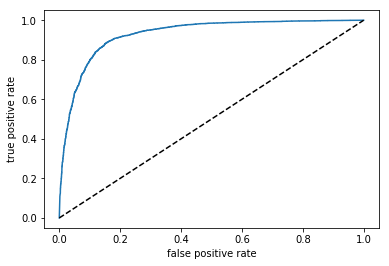

In [20]:
from sklearn.metrics import roc_curve

true_labels_bin = [1 if x == 'pos' else 0 for x in true_labels]
predictions_bin = [1 if x == 'pos' else 0 for x in predictions]
fpr, tpr, thresholds = roc_curve(true_labels_bin, model.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr);
plt.plot((0,1),(0,1),'--k');
plt.xlabel('false positive rate');
plt.ylabel('true positive rate');

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(true_labels_bin, model.predict_proba(X_test)[:,1])

0.9285819572140308

**Discussion**

1. First of all the precision and recall numbers calculated using the `confusion_matrix` method and using the `classification_report` are more or less the same. 
2. In the ROC curve we can see that there are many true positives and not many false positives with the given threshold. The area under the curve is 0.93. If there would have been more false positives with probability > threshold, the curve would have started leaning towards right at the beginning, reducing the area under the curve.  

## (optional) 4(b) Imbalanced training data
rubric={reasoning:1} 

1. Split (`X_binary`, `imdb_df.label`) into train (80%) and test (20%). Now take a subset of the training data so that you only retain 10% examples with `pos` label but keep 100% of the examples with `neg` label. 
2. Train Bernoulli Naive Bayes algorithm on this imbalanced train set.
3. Get precision and recall numbers using [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) on the test portion (which won't be imbalanced). 
4. Compare these numbers with precision and recall numbers in 4(a)?

In [22]:
# Split (`X_binary`, `imdb_df.label`) into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_binary, 
                                                    imdb_df.label, 
                                                    test_size = 0.20, 
                                                    random_state = 12)

# Create a dataframe from the sparse feature matrix and the label
X_train_df = pd.DataFrame(X_train.toarray())
X_train_df['label'] = y_train

# Get positive and negative examples from the training data
X_train_df_pos = X_train_df[X_train_df['label'] == 'pos']
X_train_df_neg = X_train_df[X_train_df['label'] == 'neg']

# Take only 10% of the positive examples
X_train_df_pos_small = X_train_df_pos.sample(frac = 0.10) 

# Create a new dataframe with 10% positive examples and all of the negative examples. 
X_train_small_df = pd.concat([X_train_df_pos_small,X_train_df_neg])

# Create X_train and y_train from the new dataframe
y_train_small = X_train_small_df['label']
X_train_small = X_train_small_df.loc[:, X_train_small_df.columns != 'label']

In [23]:
# Train BernoulliNB with the smaller X_train and y_train
model = BernoulliNB().fit(X_train_small, y_train_small)

In [24]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         neg       0.50      0.98      0.66      4987
         pos       0.65      0.04      0.07      5013

   micro avg       0.51      0.51      0.51     10000
   macro avg       0.58      0.51      0.37     10000
weighted avg       0.58      0.51      0.37     10000



#### Observations

The accuracies are markedly worse compared to 4(a). Since there are not many instances of positive reviews in the training data, it seems like the classifier is classifying most of the reviews as `neg`; the recall of `neg` class is very high (0.97) whereas the recall of `pos` class is very low (0.05). 